In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [2]:
#read in the data using pandas
df = pd.read_csv('wine_quality.csv')
#check data has been read in properly
df.head()

,@attribute fixedacid numeric,@attribute volacid numeric,@attribute citricacid numeric,@attribute residualsugar numeric,@attribute chlorides numeric,@attribute freesulfur numeric,@attribute totalsulfur numeric,@attribute density numeric,@attribute pH numeric,@attribute sulphates numeric,@attribute alcohol numeric,@attribute quality numeric (0-10)
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
4,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6


In [3]:
# Number of Rows & Columns
df.shape

(4898, 12)

In [4]:
#Check if any null values are there or not?
df.isnull().any()

@attribute fixedacid numeric         False
@attribute volacid numeric           False
@attribute citricacid numeric        False
@attribute residualsugar numeric     False
@attribute chlorides numeric         False
@attribute freesulfur numeric        False
@attribute totalsulfur numeric       False
@attribute density numeric           False
@attribute pH numeric                False
@attribute sulphates numeric         False
@attribute alcohol numeric           False
@attribute quality numeric (0-10)    False
dtype: bool

In [5]:
#Rename Column names
df = df.rename(columns={'@attribute fixedacid numeric': 'fixedacid', 
                        '@attribute volacid numeric': 'volacid',
                        '@attribute citricacid numeric': 'citricacid',
                        '@attribute residualsugar numeric': 'residualsugar',
                        '@attribute chlorides numeric': 'chlorides',
                        '@attribute freesulfur numeric': 'freesulfur',
                        '@attribute totalsulfur numeric': 'totalsulfur',
                        '@attribute density numeric' : 'density',
                        '@attribute pH numeric' : 'pH',
                        '@attribute sulphates numeric' : 'sulphates',
                        '@attribute alcohol numeric' : 'alcohol',
                        '@attribute quality numeric (0-10)' : 'quality'
                        })
df.head(5)

,fixedacid,volacid,citricacid,residualsugar,chlorides,freesulfur,totalsulfur,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
4,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6


In [6]:
df.describe()

,fixedacid,volacid,citricacid,residualsugar,chlorides,freesulfur,totalsulfur,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
# Split the wine quality data to review in following way :- 1 - Excellent, 2 - Average, 3 - Bad
def toReview(quality):
    if quality <= 4:
        return 3
    elif quality == 5 or quality == 6:
        return 2
    elif quality >= 7:
        return 1

In [9]:
df['Review'] = df['quality'].apply(toReview)

In [10]:
df.columns

Index(['fixedacid', 'volacid', 'citricacid', 'residualsugar', 'chlorides',
       'freesulfur', 'totalsulfur', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Review'],
      dtype='object')

In [11]:
df['Review'].value_counts()

2    3655
1    1060
3     183
Name: Review, dtype: int64

In [12]:
totalWines = df.shape[0]

# Number of wines with quality rating above 6
quality_above_6 = df.loc[(df['Review'] == 1)]
goodQuality = quality_above_6.shape[0]

# Number of wines with quality rating below 5
quality_below_5 = df.loc[(df['Review'] == 3)]
badQuality = quality_below_5.shape[0]

# Number of wines with quality rating between 5 to 6
quality_between_5 = df.loc[(df['Review'] == 2)]
averageQuality = quality_between_5.shape[0]

# Percentage of wines with quality rating 
goodQuality_percent = goodQuality*100/totalWines
averageQuality_percent = averageQuality*100/totalWines
badQuality_percent = badQuality*100/totalWines
# Print the results
print("Total number of wine data: {}".format(totalWines))
print("Wines with rating 7 and above: {}".format(goodQuality))
print("Wines with rating less than 5: {}".format(badQuality))
print("Wines with rating 5 and 6: {}".format(averageQuality))
print("Percentage of wines with Excellent quality: {:.2f}%".format(goodQuality_percent))
print("Percentage of wines with average quality: {:.2f}%".format(averageQuality_percent))
print("Percentage of wines with bad Quality: {:.2f}%".format(badQuality_percent))

Total number of wine data: 4898
Wines with rating 7 and above: 1060
Wines with rating less than 5: 183
Wines with rating 5 and 6: 3655
Percentage of wines with Excellent quality: 21.64%
Percentage of wines with average quality: 74.62%
Percentage of wines with bad Quality: 3.74%


Text(0, 0.5, 'Count')

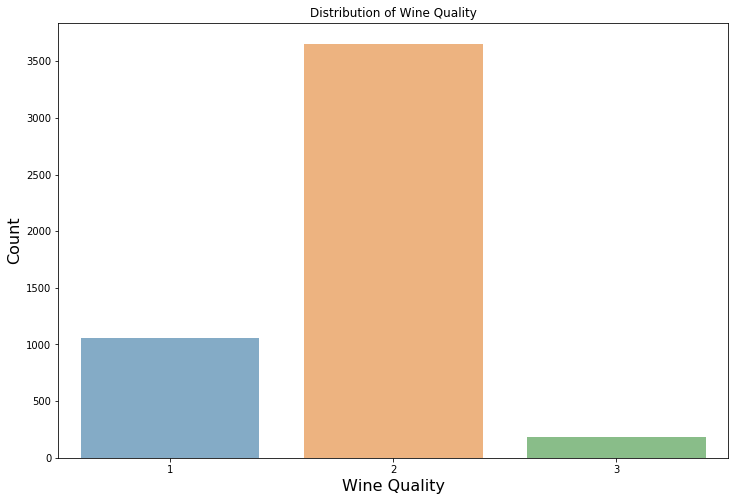

In [13]:
plt.figure(figsize=(12,8))
Review = df.Review.value_counts()
sns.barplot(y=Review.values, x=Review.index, alpha=0.6)
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [14]:
display(np.round(df.describe()))

,fixedacid,volacid,citricacid,residualsugar,chlorides,freesulfur,totalsulfur,density,pH,sulphates,alcohol,quality,Review
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,138.0,1.0,3.0,0.0,11.0,6.0,2.0
std,1.0,0.0,0.0,5.0,0.0,17.0,42.0,0.0,0.0,0.0,1.0,1.0,0.0
min,4.0,0.0,0.0,1.0,0.0,2.0,9.0,1.0,3.0,0.0,8.0,3.0,1.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,108.0,1.0,3.0,0.0,10.0,5.0,2.0
50%,7.0,0.0,0.0,5.0,0.0,34.0,134.0,1.0,3.0,0.0,10.0,6.0,2.0
75%,7.0,0.0,0.0,10.0,0.0,46.0,167.0,1.0,3.0,1.0,11.0,6.0,2.0
max,14.0,1.0,2.0,66.0,0.0,289.0,440.0,1.0,4.0,1.0,14.0,9.0,3.0


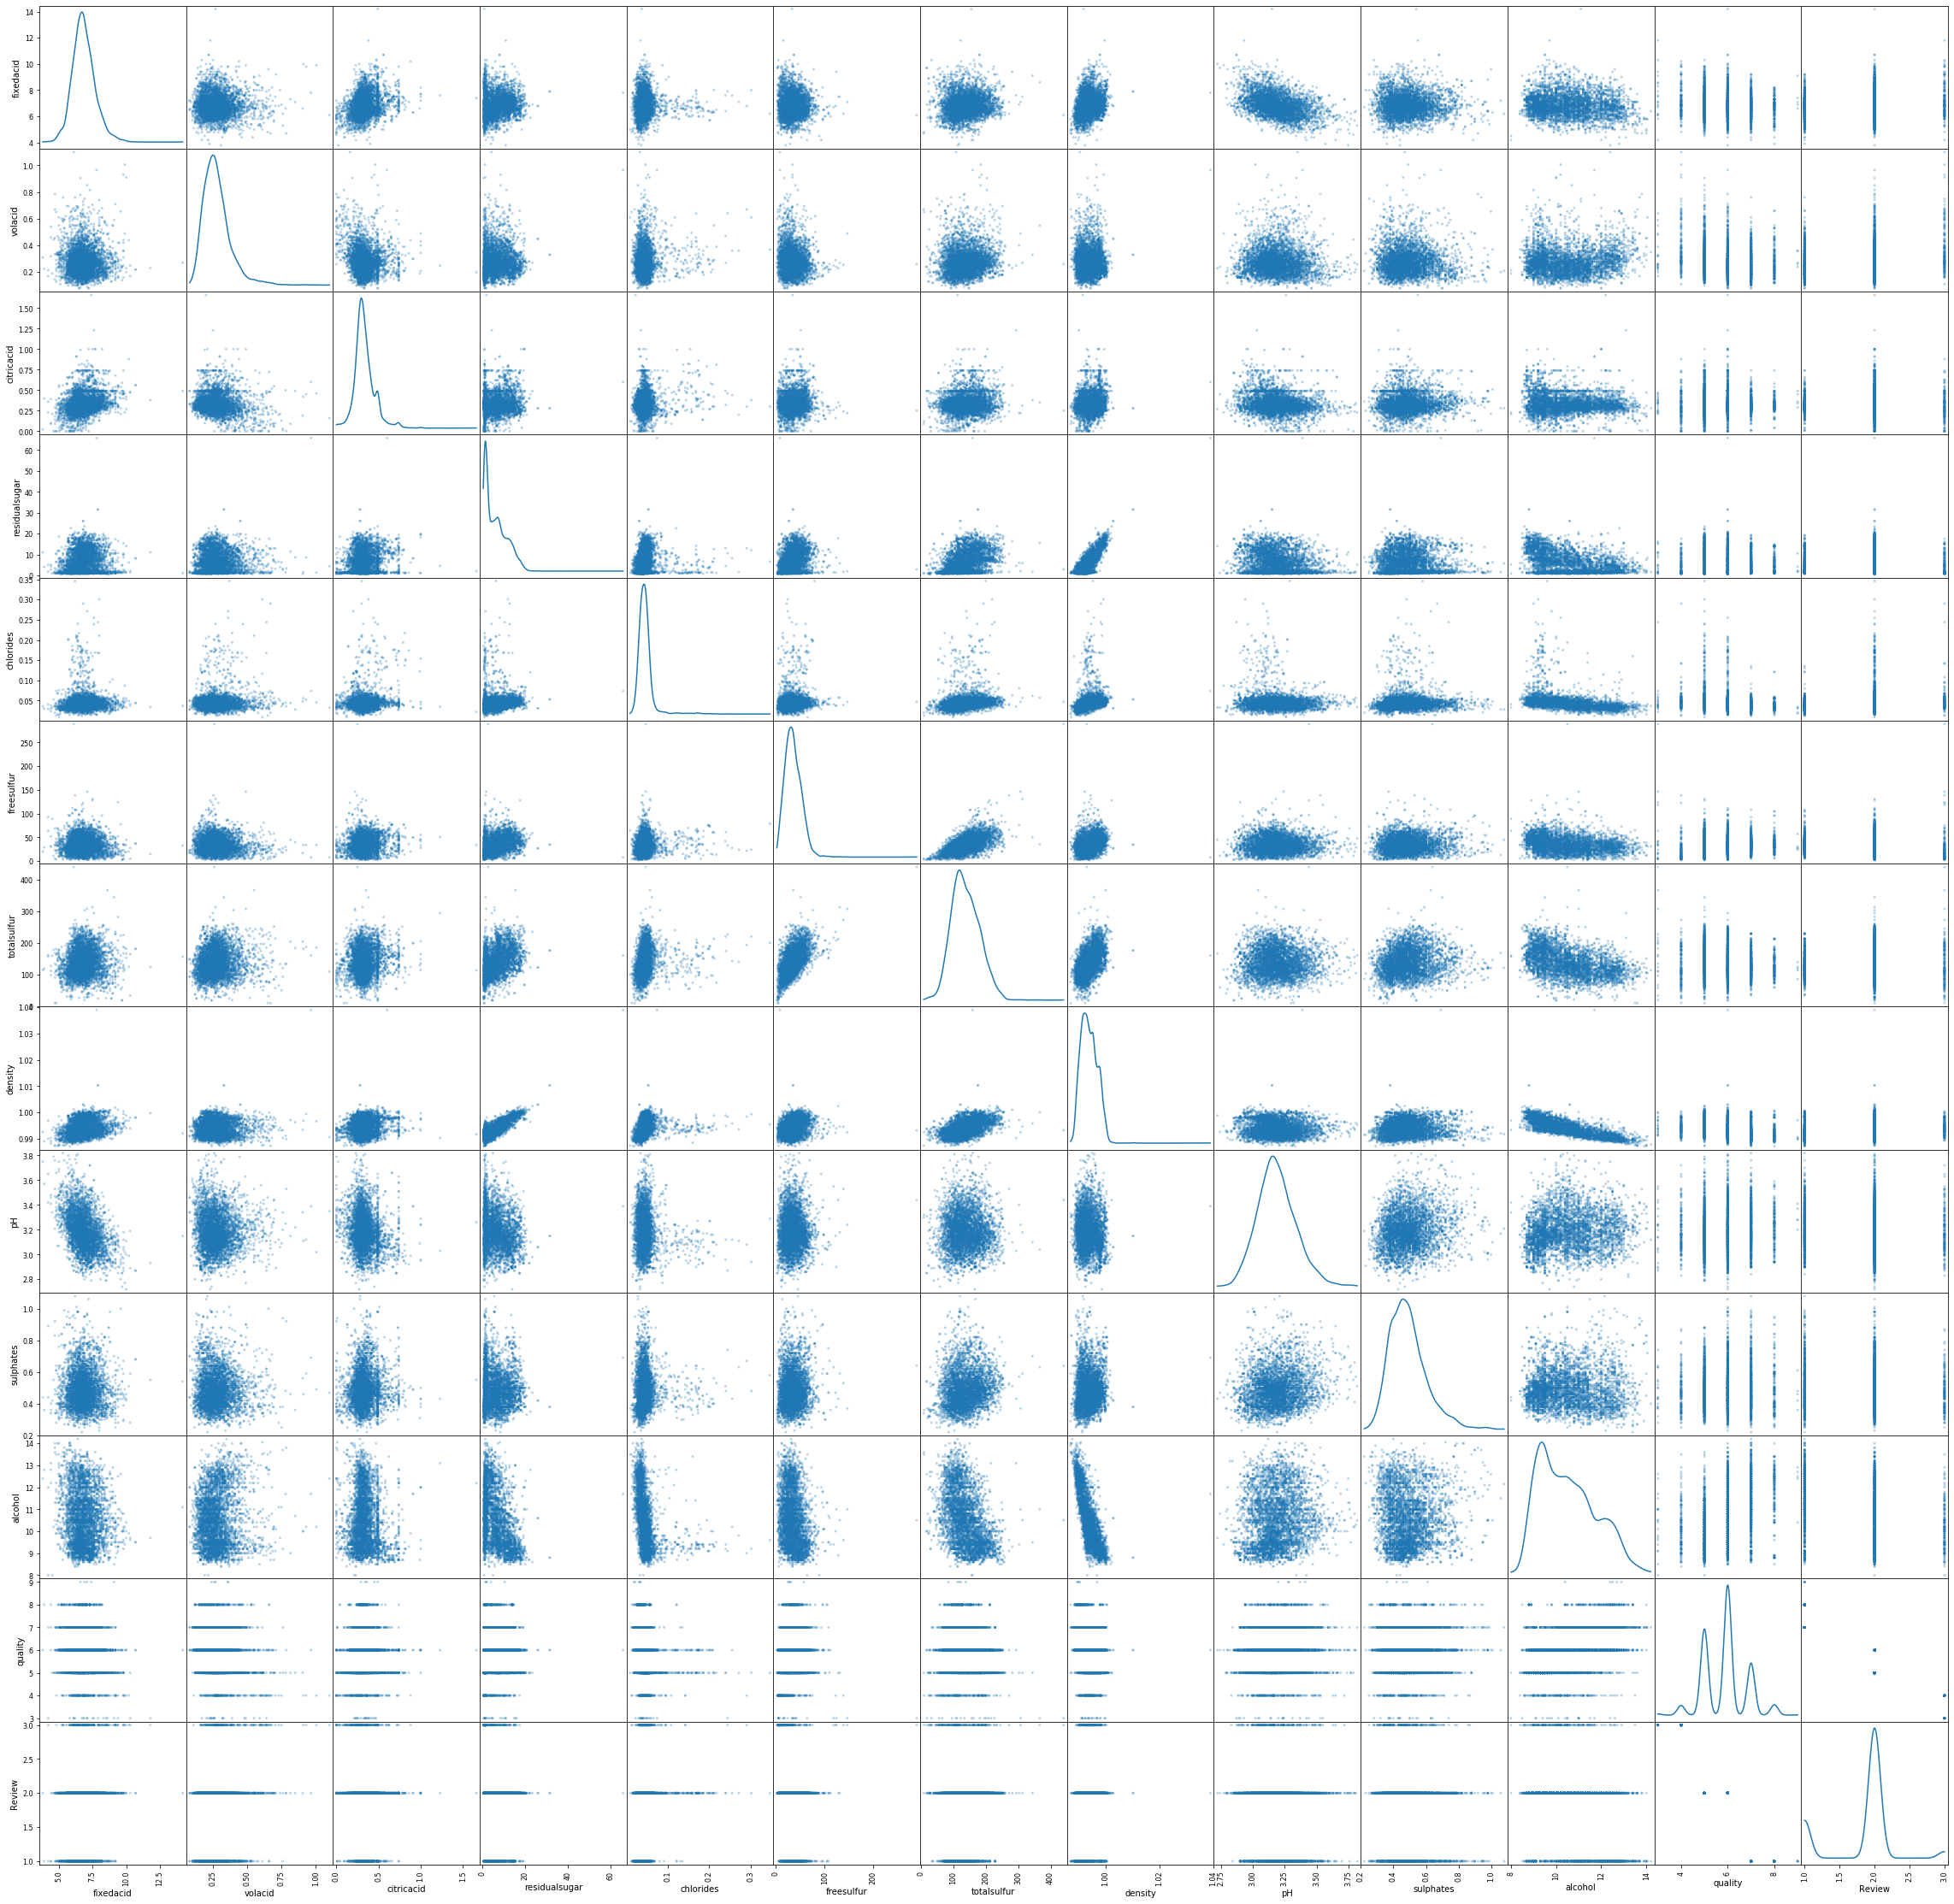

In [15]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

Text(0.5, 1, 'Correlation Matrix Heatmap')

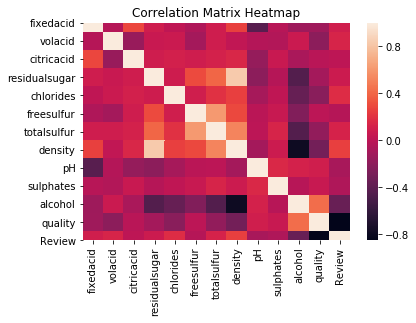

In [16]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix Heatmap')

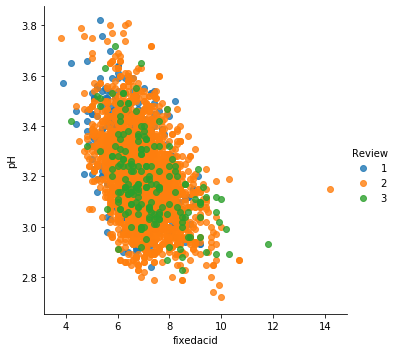

In [17]:
sns.lmplot(x='fixedacid', y='pH', data=df,
           fit_reg=False, # No regression line
           hue='Review')   # Color by evolution stage

C:\Users\palla\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


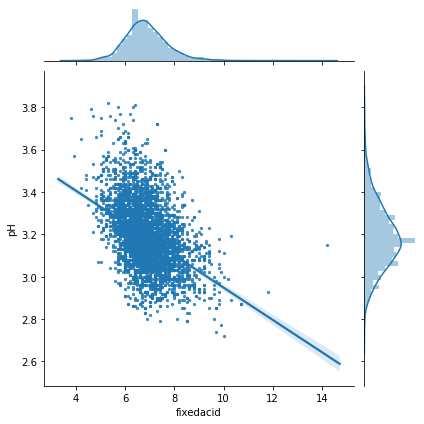

In [18]:
#pH vs. Fixed Acidity
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = df[['pH', 'fixedacid']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixedacid", y="pH", data=fixedAcidity_pH, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 5})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#the values of pH change with changing fixed acidity levels. As fixed acidity levels increase, the pH levels drop.

C:\Users\palla\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


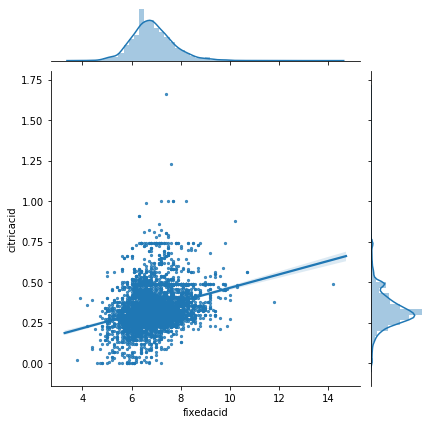

In [19]:
#Fixed Acidity vs. Citric Acid
fixedAcidity_citricAcid = df[['citricacid', 'fixedacid']]
g = sns.JointGrid(x="fixedacid", y="citricacid", data=fixedAcidity_citricAcid, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 5})
g = g.plot_marginals(sns.distplot)

#As the amount of citric acids increase, so do the fixed acidity levels.

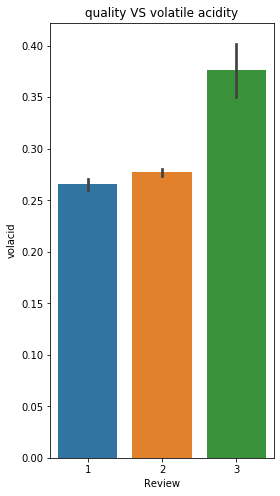

In [20]:
#Volatile Acidity vs Quality
fig, axs = plt.subplots(ncols=1,figsize=(4,8))
sns.barplot(x='Review', y='volacid', data = df, ax=axs)
plt.title('quality VS volatile acidity')
plt.show()
# A higher quality is usually associated with low volatile acidity levels.

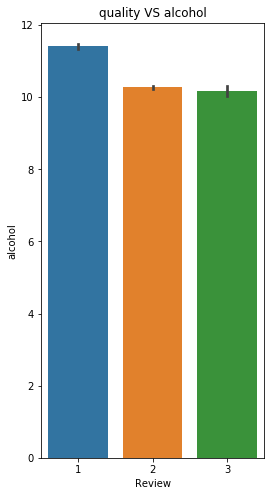

In [21]:
#alcohol vs Quality
fig, axs = plt.subplots(ncols=1,figsize=(4,8))
sns.barplot(x='Review', y='alcohol', data = df, ax=axs)
plt.title('quality VS alcohol')
plt.show()

In [46]:
X = df.drop(columns=['Review', 'quality'])
X.head(5)

,fixedacid,volacid,citricacid,residualsugar,chlorides,freesulfur,totalsulfur,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
3,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
4,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5


In [23]:
y = df['Review'].values
y[0:11]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2], dtype=int64)

In [35]:
feature_list = list(X.columns)
print(feature_list)

['fixedacid', 'volacid', 'citricacid', 'residualsugar', 'chlorides', 'freesulfur', 'totalsulfur', 'density', 'pH', 'sulphates', 'alcohol']


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [25]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [26]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=3).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


pca_std = PCA(n_components=3).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

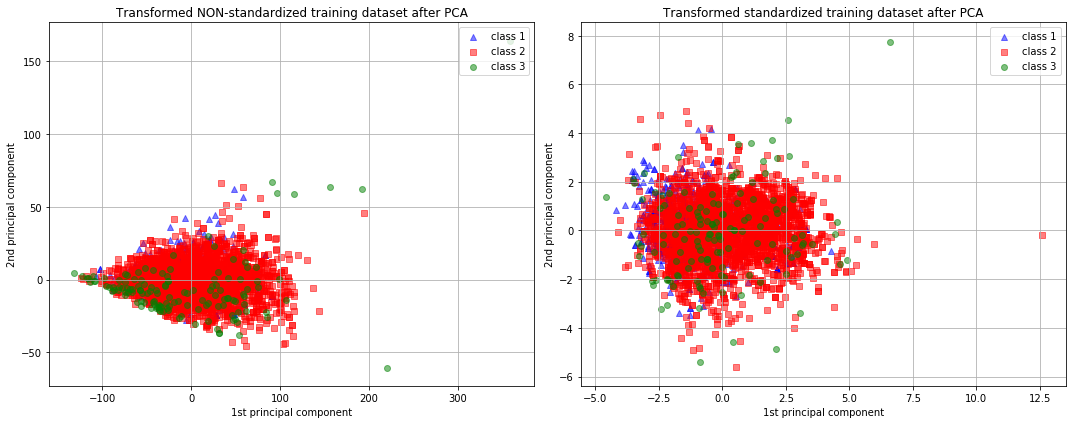

In [27]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)

In [29]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
73.77%

Prediction accuracy for the test dataset
75.03%



In [30]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
73.75%

Prediction accuracy for the test dataset
76.53%



In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

C:\Users\palla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7585034013605442


In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_std, y_train)
y_pred=lr.predict(X_test_std)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7700680272108843


C:\Users\palla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\palla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
